# Pymaceuticals Inc.
---
## Analysis
- The purpose of this document is to provide Pymaceuticals Inc. a summary of data related to the effectiveness of various cancer treatments on mice. There are ten total treatments and 248 test subjects; information about the tumor volume and number of metastatic sites has been collected for each mouse across several time points. Duplicate data has been removed.
### Summary Statistics
- The summary statistics include mean, median, variance, standard deviation and standard error of the tumor volume for each treatment.
- Eight of the treatments have means between 52 mm<sup>3</sup> and 55.5 mm<sup>3</sup> excepting Capomulin and Ramicane which are 40.2 mm<sup>3</sup> and 40.7 mm<sup>3</sup>, respectively. Ramicane and Capomulin also had the least variability compared to the other treatments.
### Bar and Pie Charts
- The bar chart has been generated to show the number of timepoints for each treatment. The values ranged from 230 to 148 with seven of the treatments between 178 and 188. The treatment with the greatest number of timepoints is Capomulin at 230 with Ramicane following with 228; the treatment with the least number of timepoints is Propriva with 148.
- This metric can be used as an indicator of treatment success because a greater number of treatments indicates a longer mouse lifespan.
- The pie chart has been generated to visualize the number of male and female mice used in the experiment. The population consists of 50.4% males and 49.6% females.
- _Note: There have been two of each chart generated to demonstrate chart generation with both Pandas and pyplot._
### Quartiles, Outliers and Boxplots
- Summary statistics for the tumor volumes of the four most successful treatments (Ramicane, Capomulin, Infubinol and Ceftamin) are presented in various ways. A boxplot, line chart and scatter plot are all included. Before working with the data, potential outliers are identified.
- The box plot provides a five-number summary for each of the treatments specified. The treatment with the smallest interquartile range is Capomulin and the greatest is Ceftamin. Capomulin and Ramicane have medians near 36 mm<sup>3</sup> while Infubinol and Ceftamin have medians near 60 mm<sup>3</sup>.
- The line chart shows tumor volume over time for an individual mouse. The mouse ID object can be changed to view other mice.
- The scatter plot shows the relationship between average tumor volume and the weight of each mouse. This scatter plot will be used for a correlation and regression.
### Correlation and Regression
- The correlation coefficient for the relationship between mouse weight and tumor volume is .84, this indicates a strong relationship between the two variables; this means that mice who weigh more have tumors with a larger volume in general. The r-squared value is .71 which indicates that 71% of variance of tumor size is explained by mouse weight. Other variables that could affect this variance could be age, sex or pre-existing conditions.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
full_study_results = pd.merge(mouse_metadata, study_results, on='Mouse ID')

# Display the data table for preview
full_study_results.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
num_mice = len(full_study_results['Mouse ID'].unique())
num_mice

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicate_mouse = full_study_results.loc[full_study_results.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False), :]
duplicate_mouse['Mouse ID'].unique()

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID.
duplicate_mouse_data = full_study_results[full_study_results['Mouse ID'] == 'g989']
duplicate_mouse_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
full_study_results = full_study_results[full_study_results['Mouse ID'] != 'g989']
full_study_results.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [6]:
# Checking the number of mice in the clean DataFrame.
num_mice = len(full_study_results['Mouse ID'].unique())
num_mice

248

## Summary Statistics

In [7]:

# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mean = full_study_results.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median = full_study_results.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
variance = full_study_results.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
stddev = full_study_results.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
sem = full_study_results.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.
data = {'Mean Tumor Volume': mean,
        'Median Tumor Volume': median,
        'Tumor Volume Variance': variance,
        'Tumor Volume Std. Dev.': stddev,
        'Tumor Volume Std. Err.': sem}
tumor_volume_summary = pd.DataFrame(data)
tumor_volume_summary

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
tumor_volume_summary = full_study_results.groupby('Drug Regimen').agg({'Tumor Volume (mm3)':['mean', 'median', 'var', 'std', 'sem']})
tumor_volume_summary

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

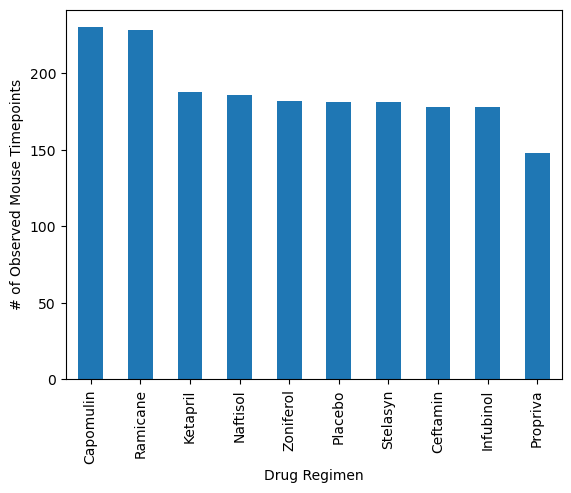

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
drug_rows_pd = pd.DataFrame(full_study_results.groupby('Drug Regimen')['Mouse ID'].count()).sort_values('Mouse ID', ascending=False)
drug_rows_pd.plot(kind='bar', xlabel='Drug Regimen', ylabel='# of Observed Mouse Timepoints', legend=False)
plt.show()

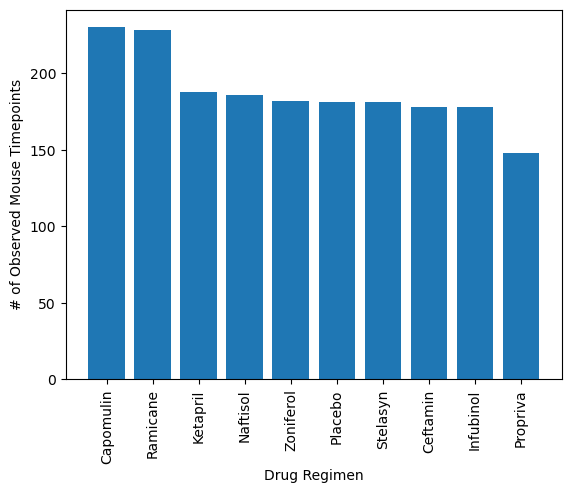

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
drug_rows_py = drug_rows_pd.reset_index()

x_axis =  np.arange(len(drug_rows_py))
tick_locations = [value for value in x_axis]

plt.bar(x_axis, drug_rows_py['Mouse ID'])
plt.xticks(tick_locations, drug_rows_py['Drug Regimen'], rotation="vertical")
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.show()

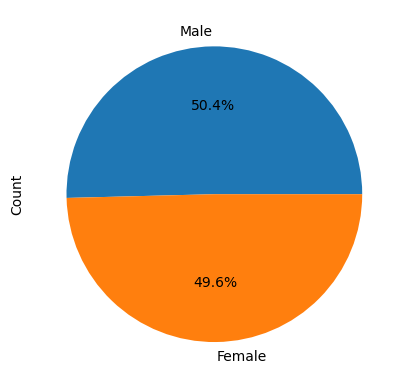

In [11]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study
unique_mouse_id = full_study_results.drop_duplicates(subset = 'Mouse ID')
# Get the unique mice with their gender
gender_counts_pd = (unique_mouse_id.groupby('Sex')['Mouse ID'].count()).sort_values(ascending = False)

# Make the pie chart
gender_counts_pd.plot(kind='pie',autopct='%1.1f%%', ylabel='Count')
plt.show()

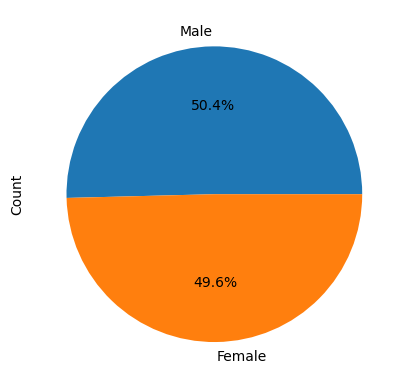

In [12]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study
# Get the unique mice with their gender
gender_counts_py = gender_counts_pd

# Make the pie chart
plt.pie(gender_counts_pd, autopct='%1.1f%%', labels=gender_counts_pd.index.unique())
plt.ylabel('Count')
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin
timepoints = full_study_results.groupby('Mouse ID')['Timepoint'].idxmax()

# Start by getting the last (greatest) timepoint for each mouse
final_tumor_size = full_study_results.loc[timepoints]

final_tumor_size
# Merge this group df with the original dataframe to get the tumour volume at the last timepoint
# I think I just did this another way

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
463,a203,Infubinol,Female,20,23,45,67.973419,2
473,a251,Infubinol,Female,21,25,45,65.525743,1
483,a262,Placebo,Female,17,29,45,70.717621,4
493,a275,Ceftamin,Female,20,28,45,62.999356,3
500,a366,Stelasyn,Female,16,29,30,63.440686,1
...,...,...,...,...,...,...,...,...
1862,z435,Propriva,Female,12,26,10,48.710661,0
84,z578,Ramicane,Male,11,16,45,30.638696,0
1872,z581,Infubinol,Female,24,25,45,62.754451,3
1882,z795,Naftisol,Female,13,29,45,65.741070,3


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty dicts to fill with tumor vol data (for plotting) and summary data
tumor_vol_data = {treatment: [] for treatment in treatments}
treatment_summary = {treatment: [] for treatment in treatments}

# Calculate the IQR and quantitatively determine if there are any potential outliers.
count = 0
for treatment in treatments:
    # Fill tumor_vol_data with tumor volumes for each treatment
    temp = []
    for index, row in final_tumor_size.iterrows():    
        if row['Drug Regimen'] == treatments[count]:      
            temp.append(row['Tumor Volume (mm3)']) 
    tumor_vol_data[treatment] = temp
    # Calculate summary data for each treatment and populate treatment_summary
    quartiles = np.percentile(tumor_vol_data[treatment], [25, 50, 75])
    iqr = quartiles[2] - quartiles[0]
    min = quartiles[0] - (1.5 * iqr)
    max = quartiles[2] + (1.5 * iqr)
    treatment_summary[treatment] = [min] + list(quartiles) + [max] + [iqr]
    # Find outliers and add them to a list
    outliers = final_tumor_size.loc[(final_tumor_size['Drug Regimen'] == treatment) & 
                                ((final_tumor_size['Tumor Volume (mm3)'] > treatment_summary[treatment][4]) | 
                                 (final_tumor_size['Tumor Volume (mm3)'] < treatment_summary[treatment][0])), 
                                ['Tumor Volume (mm3)']].values.flatten()
    # Print outliers
    if outliers.size > 0:
        print(f"{treatment}'s potential outliers: {[outliers[i] for i in range(len(outliers))]}")
    else:
        print(f"{treatment}'s potential outliers: None")
    count += 1


Capomulin's potential outliers: None
Ramicane's potential outliers: None
Infubinol's potential outliers: [36.3213458]
Ceftamin's potential outliers: None


In [15]:
# Create dataframe with final tumor size data for each treatment
tumor_vol_per_treatment = pd.DataFrame(tumor_vol_data)
tumor_vol_per_treatment.head()

,Capomulin,Ramicane,Infubinol,Ceftamin
0,38.982878,38.407618,67.973419,62.999356
1,38.939633,43.047543,65.525743,45.000000
2,30.485985,38.810366,57.031862,56.057749
3,37.074024,32.978522,66.083066,55.742829
4,40.159220,38.342008,72.226731,48.722078


In [21]:
# Create merged dataframe
renamed = final_tumor_size.rename(columns = {'Tumor Volume (mm3)':'Final Size (mm3)'})
merged = pd.merge(renamed,full_study_results,how='outer',on=['Mouse ID', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)', 'Timepoint', 'Metastatic Sites'])
merged['Final Size (mm3)'] = merged.groupby('Mouse ID')['Final Size (mm3)'].bfill()
merged                                                         

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Final Size (mm3),Metastatic Sites,Tumor Volume (mm3)
0,a203,Infubinol,Female,20,23,0,67.973419,0,45.000000
1,a203,Infubinol,Female,20,23,5,67.973419,0,48.508468
2,a203,Infubinol,Female,20,23,10,67.973419,1,51.852437
3,a203,Infubinol,Female,20,23,15,67.973419,1,52.777870
4,a203,Infubinol,Female,20,23,20,67.973419,1,55.173336
...,...,...,...,...,...,...,...,...,...
1875,z969,Naftisol,Male,9,30,25,73.867845,2,63.145652
1876,z969,Naftisol,Male,9,30,30,73.867845,3,65.841013
1877,z969,Naftisol,Male,9,30,35,73.867845,4,69.176246
1878,z969,Naftisol,Male,9,30,40,73.867845,4,70.314904


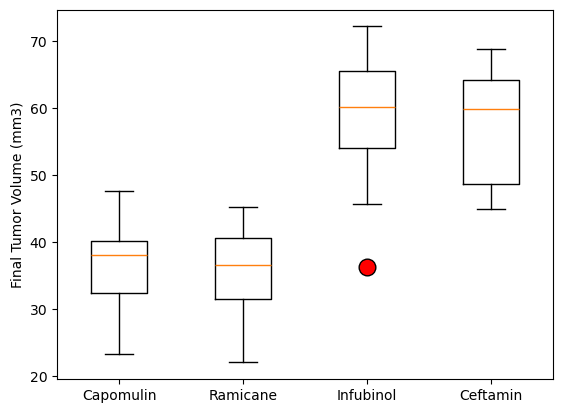

In [22]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
plt.boxplot(tumor_vol_per_treatment, labels=treatments, flierprops={'markersize': 12, 'markerfacecolor': 'red'})
plt.ylabel('Final Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots

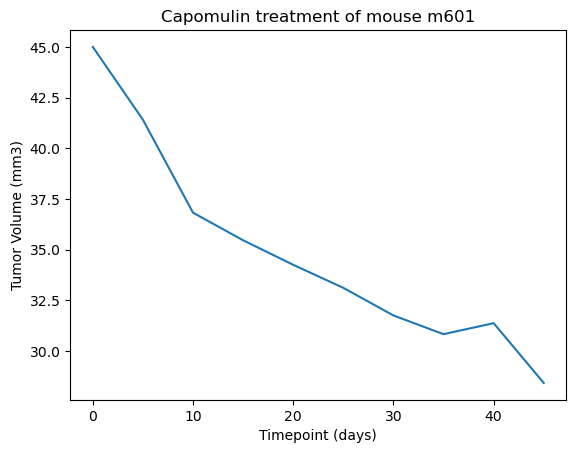

In [18]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
treatment = 'Capomulin'
mouse_id = 'm601'

treatment_data = full_study_results.loc[full_study_results['Drug Regimen'] == treatment,:]
single_mouse_data = treatment_data.loc[treatment_data['Mouse ID'] == mouse_id, ['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)']]

title = f'{treatment} treatment of mouse {mouse_id}'
plt.plot(single_mouse_data['Timepoint'],single_mouse_data['Tumor Volume (mm3)'])
plt.title(title)
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

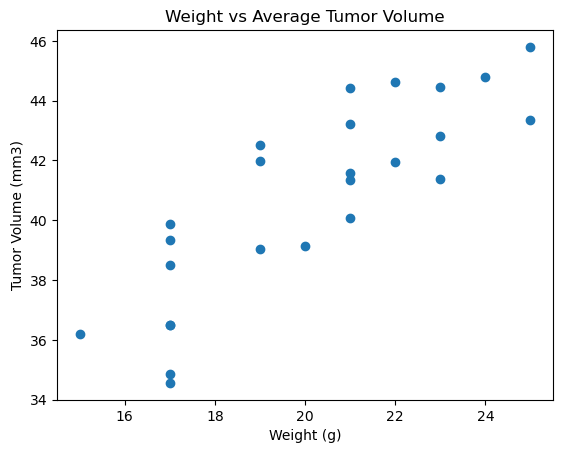

In [19]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
avg_tumor_size_by_mouse_weight = treatment_data.groupby('Mouse ID').agg({'Tumor Volume (mm3)':'mean', 'Weight (g)': 'first'}).reset_index()
avg_tumor_size_by_mouse_weight
x_values = avg_tumor_size_by_mouse_weight['Weight (g)']
y_values = avg_tumor_size_by_mouse_weight['Tumor Volume (mm3)']

plt.scatter(x_values, y_values)
plt.title('Weight vs Average Tumor Volume')
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()


## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


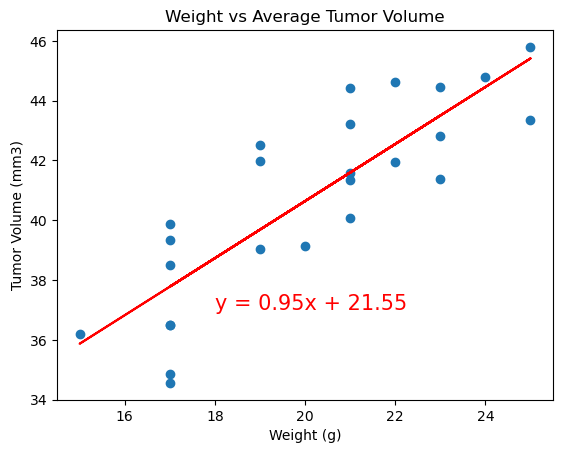

In [20]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f'The correlation between mouse weight and the average tumor volume is {round(rvalue,2)}')

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(18,37),fontsize=15,color="red")
plt.title('Weight vs Average Tumor Volume')
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()